<a href="https://colab.research.google.com/github/EMiheeva/Diploma_work_-Development-of-a-classification-system-for-skin-diseases-with-CNN/blob/main/Diploma_Image_analysis_of_skin_diseases_June_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAM10000 ("Human Against Machine with 10000 training images")** dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :<br>
**1. Melanocytic nevi <br>**
**2. Melanoma <br>**
**3. Benign keratosis-like lesions <br>**
**4. Basal cell carcinoma <br>**
**5. Actinic keratoses <br>**
**6. Vascular lesions <br>**
**7. Dermatofibroma<br>**

# Step 1 : importing Essential Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers import BatchNormalization
from keras.utils import to_categorical

from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Step 2 : Making Dictionary of images and labels

In [ ]:
base_skin_dir = os.path.join('..', 'input')

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Step 3 : Reading & Processing data

In [ ]:
import kagglehub
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

In [ ]:
data_directory = os.path.join("/kaggle/input/", "skin-cancer-mnist-ham10000/")
os.listdir(data_directory)
skin_df = pd.read_csv(os.path.join(data_directory, 'HAM10000_metadata.csv'))

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(data_directory, '*', '*.jpg'))}

In [ ]:
# Новые столбцы для читабельности данных
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes


In [ ]:
# Проверить новые столбцы
skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
1  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
2  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
3  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
4  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

# Step 4 : Data Cleaning


In [ ]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [ ]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)

<ipython-input-8-8b8ec19cc3cf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)


In [ ]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [ ]:
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


# Step 5 : EDA

<Axes: xlabel='cell_type'>

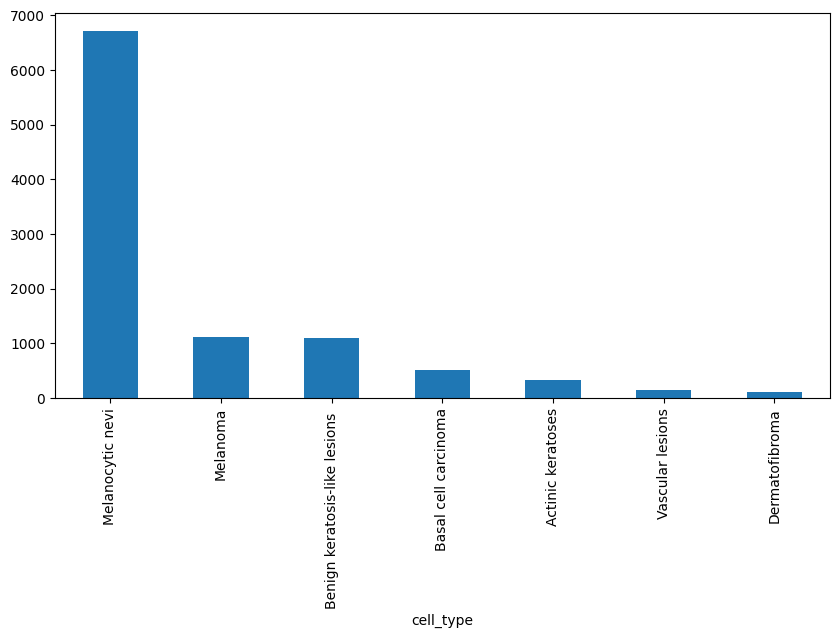

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

<Axes: xlabel='dx_type'>

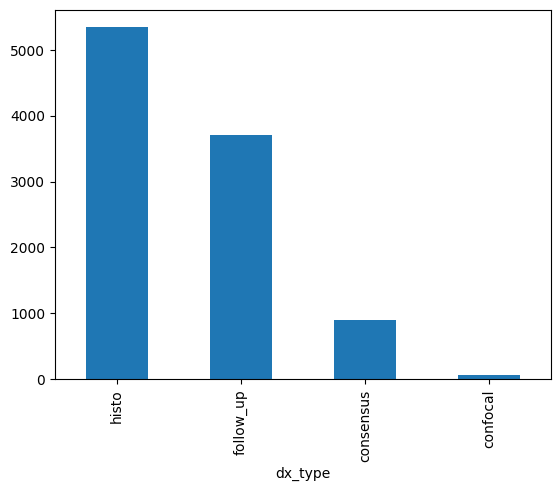

In [ ]:
skin_df['dx_type'].value_counts().plot(kind='bar')

<Axes: xlabel='localization'>

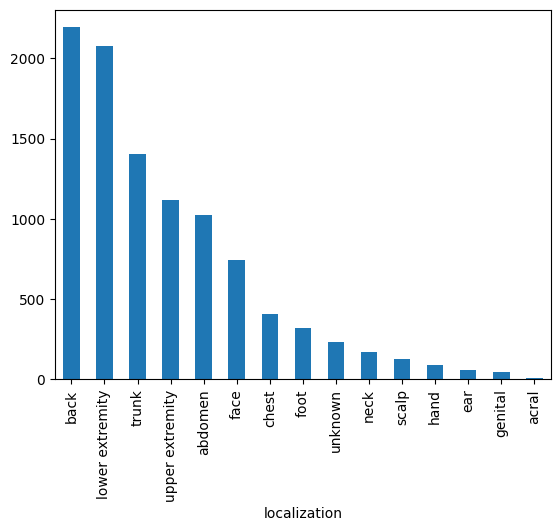

In [ ]:
skin_df['localization'].value_counts().plot(kind='bar')

<Axes: >

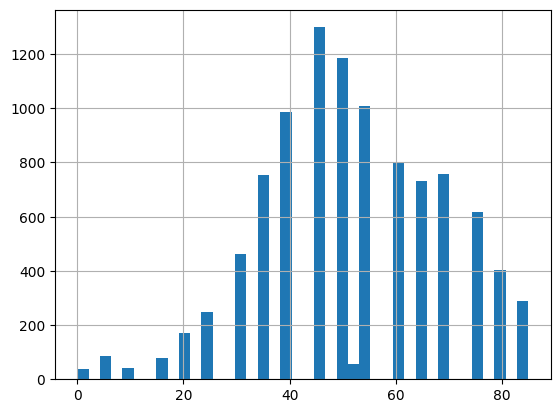

In [ ]:
skin_df['age'].hist(bins=40)

<Axes: xlabel='sex'>

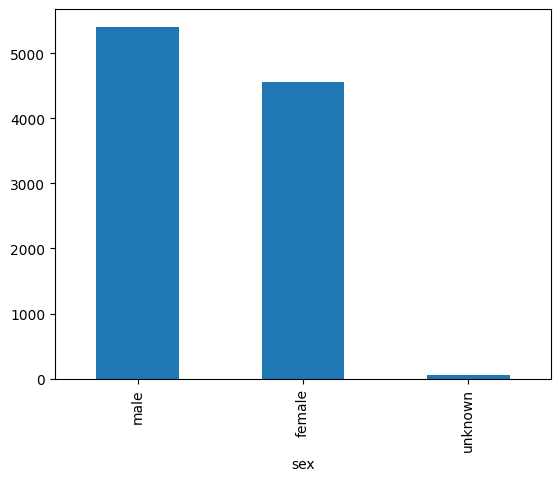

In [ ]:
skin_df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='cell_type_idx'>

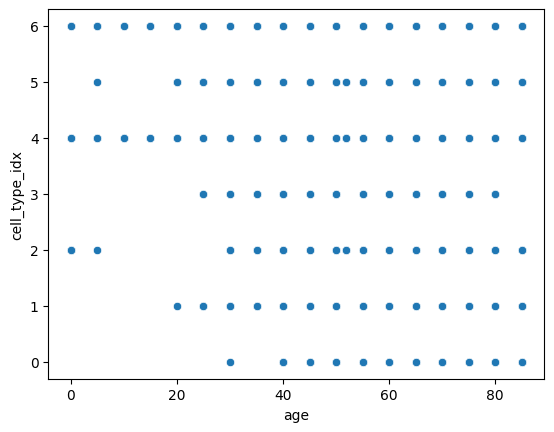

In [ ]:
sns.scatterplot(data=skin_df, x='age', y='cell_type_idx')

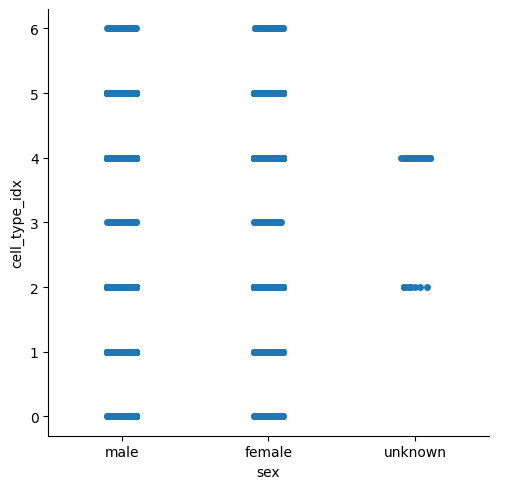

In [ ]:
sns.catplot(x='sex', y='cell_type_idx', data=skin_df, kind='strip')

# Step 6: Loading and resizing of images


In [ ]:
SIZE = 75
CHANELL = 3

In [ ]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
1  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
2  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
3  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   
4  /kaggle/input/skin-cancer-mnist-ham10000/ham10...   

                        cell_type  cell_type_idx  \
0  Benign keratosis-like lesions               2   
1  Benign keratosis-like lesions               2   
2  Benign keratosis-like lesions               2   
3  Benign keratosis-like lesions               2   
4  Benign keratosis-like lesions               2   

                                               image  
0  [[[191, 153, 195], [191, 154, 195], [192, 150,...  
1  [[[24, 13, 22], [24, 14, 26], [30, 18, 37], [4...  
2  [[[186, 128, 139], [191, 134, 149], [197, 143,...  
3  [[[23, 11, 18], [31, 16, 26], [52, 30, 40], [7...  
4  [[[136, 93, 115], [153, 108, 132], [170, 126, ...

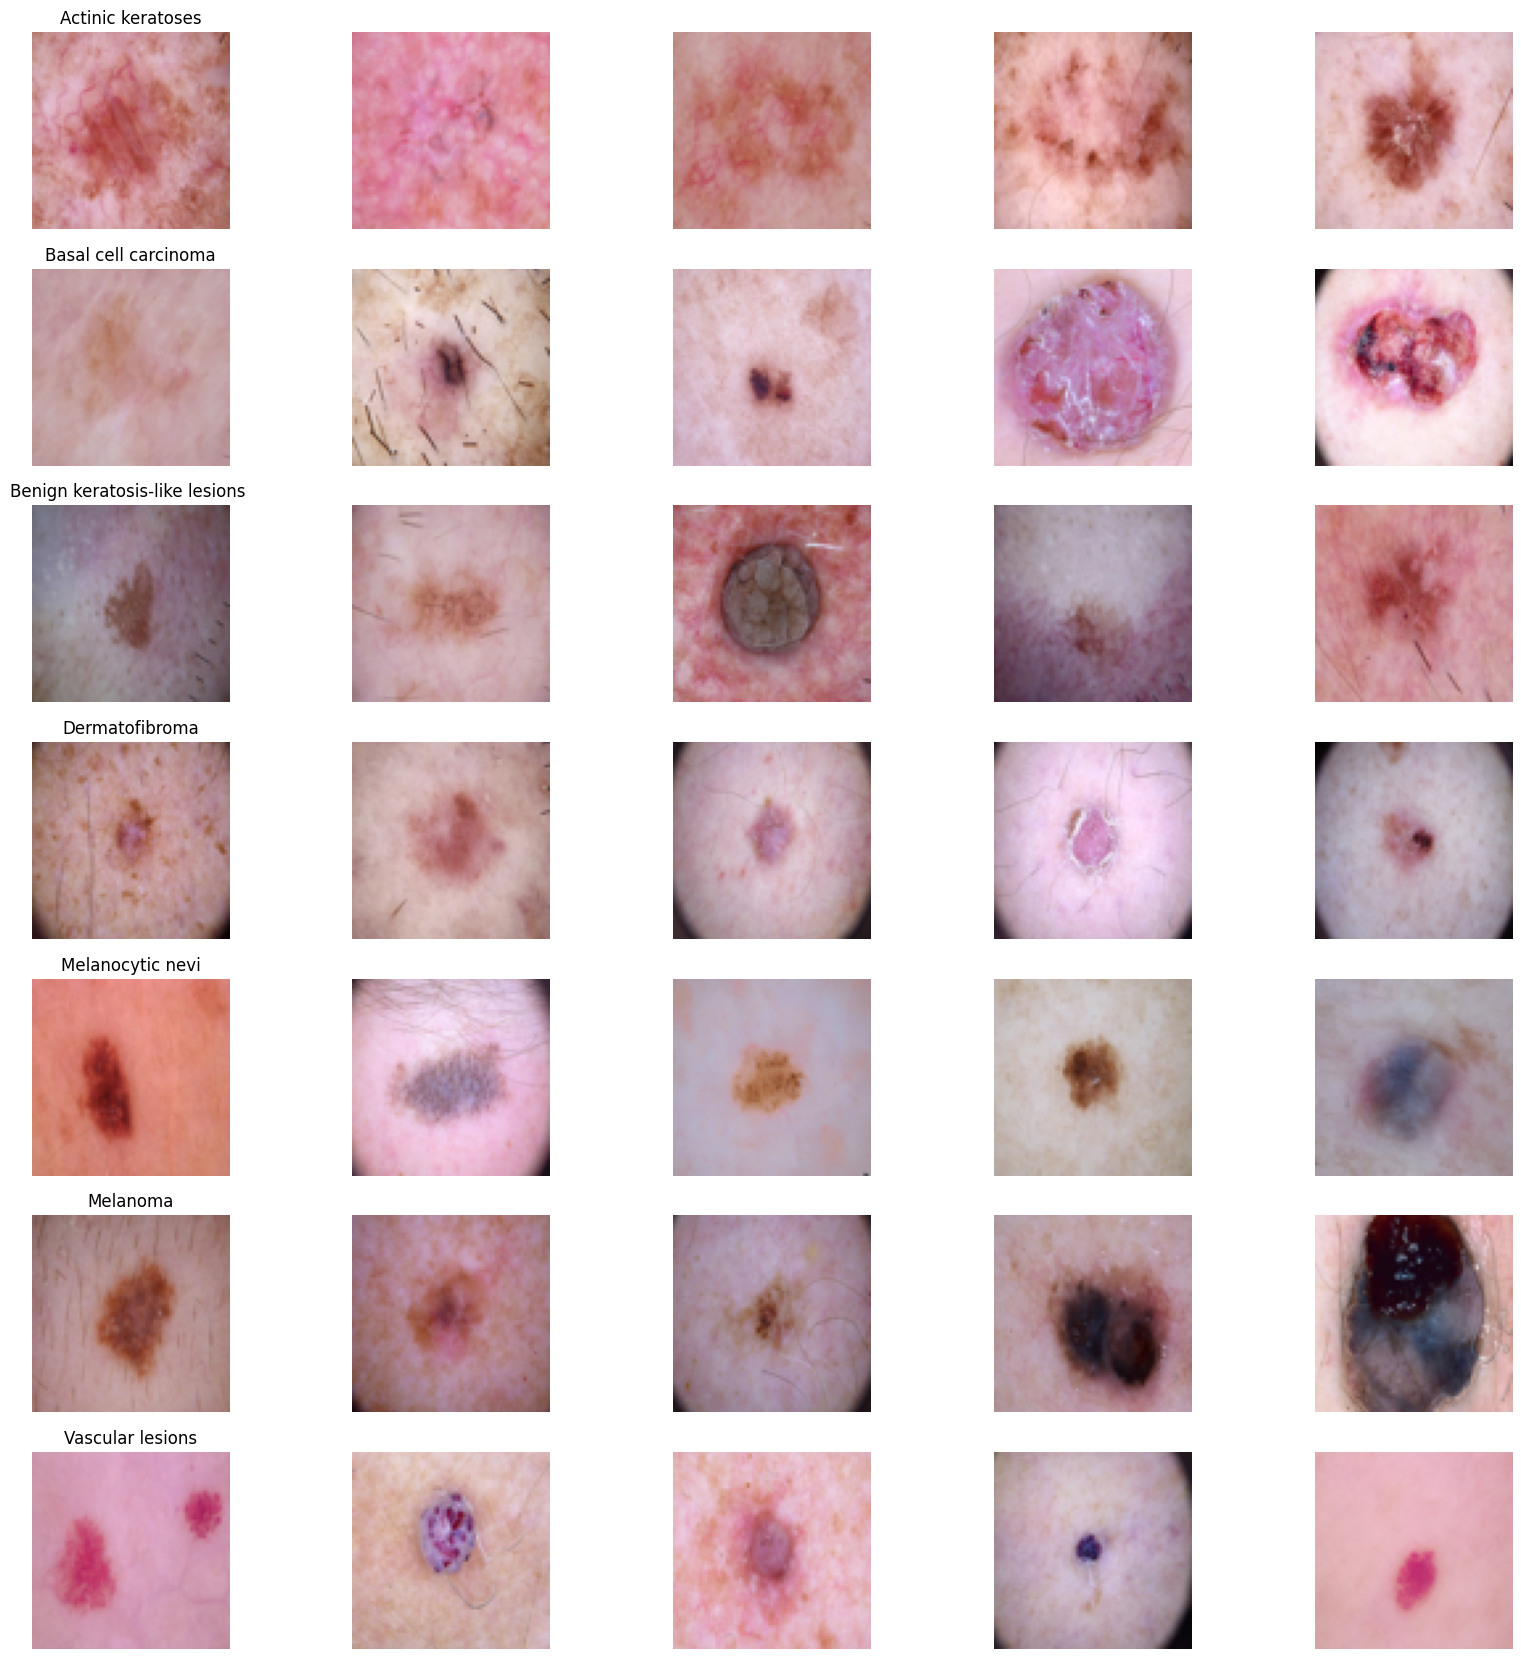

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
skin_df['image'].map(lambda x: x.shape).value_counts()

image
(75, 75, 3)    10015
Name: count, dtype: int64

In [ ]:
features=skin_df.drop(columns=['cell_type_idx'],axis=1)
target=skin_df['cell_type_idx']

# Step 7 : Train Test Split

In [ ]:
#x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [ ]:
from sklearn.utils import resample
Train, Test = train_test_split(skin_df, test_size=0.20,random_state=1234)
print(Train['cell_type_idx'].value_counts())
n_samples=1000
train_r = pd.DataFrame()
for i in range(0, 7):
  df = Train[Train['cell_type_idx'] == i]
  if len(df)<n_samples:
    df = resample(df, replace=True, n_samples=n_samples, random_state=1234)
  train_r = pd.concat([train_r, df])
print(train_r['cell_type_idx'].value_counts())

cell_type_idx
4    5385
2     875
5     867
1     417
0     267
6     113
3      88
Name: count, dtype: int64
cell_type_idx
4    5385
1    1000
0    1000
2    1000
3    1000
5    1000
6    1000
Name: count, dtype: int64


In [ ]:
x_train_o=train_r.drop(columns=['cell_type_idx'],axis=1)
y_train_o=train_r['cell_type_idx']
x_test_o=Test.drop(columns=['cell_type_idx'],axis=1)
y_test_o=Test['cell_type_idx']

# Step 8 : Normalization

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
print(x_train_mean)
print(x_train_std)
print(x_test_mean)
print(x_test_std)

162.53284987459134
44.696202543209715
159.55190964664115
46.21358616513246


# Step 9 : One-hot encoding


In [ ]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

# Step 10 : Splitting training and validation split

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(SIZE, SIZE, CHANELL))
x_test = x_test.reshape(x_test.shape[0], *(SIZE, SIZE, CHANELL))
x_validate = x_validate.reshape(x_validate.shape[0], *(SIZE, SIZE, CHANELL))

# Step 11: Model Building

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Параметры
SIZE = 75  # размер изображения (рекомендуется 75x75+ для InceptionV3)
CHANNELS = 3  # RGB
num_classes = 7  # число классов

# Загрузка предобученной InceptionV3 (без верхних слоёв)
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(SIZE, SIZE, CHANNELS)
)

# Заморозка всей базовой модели
base_model.trainable = False

# Создание новой модели поверх InceptionV3
inputs = Input(shape=(SIZE, SIZE, CHANNELS))
x = base_model(inputs, training=False)  # важно для BatchNorm
x = GlobalAveragePooling2D()(x)  # усреднение вместо Flatten
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

# Загружаем предобученную модель VGG19 (без верхних слоев)
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, CHANELL))

# Замораживаем базовую модель
base_model.trainable = False

# Создаем новую модель поверх VGG16
inputs = Input(shape=(SIZE, SIZE, CHANELL))
x = base_model(inputs, training=False)  # убедимся, что базовые слои в inference mode
x = GlobalAveragePooling2D()(x)  # глобальный усредняющий пулинг вместо Flatten
outputs = Dense(num_classes, activation='softmax')(x)  # выходной слой

model = Model(inputs, outputs)

# Можно посмотреть архитектуру модели
model.summary()

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

# Загружаем предобученную модель VGG19 (без верхних слоев)
base_model = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, CHANELL))

# Замораживаем базовую модель
base_model.trainable = False

# Создаем новую модель поверх VGG19
inputs = Input(shape=(SIZE, SIZE, CHANELL))
x = base_model(inputs, training=False)  # убедимся, что базовые слои в inference mode
x = GlobalAveragePooling2D()(x)  # глобальный усредняющий пулинг вместо Flatten
outputs = Dense(num_classes, activation='softmax')(x)  # выходной слой

model = Model(inputs, outputs)

# Можно посмотреть архитектуру модели
model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Lambda, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

# Load the MobileNetV2 model, pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, CHANELL))

# Freeze the base model
base_model.trainable = False

# Create new model on top
inputs = Input(shape=(SIZE, SIZE, CHANELL))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

# Build the model using ResNet50 as base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, CHANELL))

# Freeze first 45 layers (all except last 5)
for layer in base_model.layers[:45]:
    layer.trainable = False
for layer in base_model.layers[45:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add custom dense layers as per the paper
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 81, 81, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 38, 38,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 38, 38,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 38, 38,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 40, 40,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 19, 19,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 19, 19,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 19, 19,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 19, 19,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 19, 19,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 19, 19,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 19, 19,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 19, 19,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 19, 19,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_3_c

 Total params: 24,148,103 (92.12 MB)

 Trainable params: 23,686,151 (90.36 MB)

 Non-trainable params: 461,952 (1.76 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

SIZE = 75
CHANNEL = 3
input_shape = (SIZE, SIZE, CHANNEL)
num_classes = 7

# 1. ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
print("\n[ResNet50 Base Model]")
print(f"Количество слоев в ResNet50: {len(base_model.layers)}")  # 175 слоев в полной ResNet50

# 2. Заморозка слоев
for layer in base_model.layers[:45]:
    layer.trainable = False
for layer in base_model.layers[45:]:
    layer.trainable = True
print(f"Заморожено слоев: 45 (первые 45), разморожено: {len(base_model.layers) - 45}")

# 3. Добавление кастомных слоев
x = base_model.output
print(f"\n[Custom Head]")
print(f"Входной тензор после ResNet50: {x.shape}")  # (None, 3, 3, 2048) для 75x75

# Глобальный пулинг
x = GlobalAveragePooling2D()(x)
print(f"После GlobalAveragePooling2D: {x.shape}")  # (None, 2048)

# Полносвязные слои
x = Dense(256, activation='relu', name='FC_256')(x)
x = BatchNormalization(name='BN_1')(x)
x = Dropout(0.5, name='Dropout_1')(x)
x = BatchNormalization(name='BN_2')(x)
x = Dense(128, activation='relu', name='FC_128')(x)
x = Dropout(0.5, name='Dropout_2')(x)
print(f"После полносвязных слоев: {x.shape}")  # (None, 128)

# Выходной слой
predictions = Dense(num_classes, activation='softmax', name='Output')(x)
print(f"Выходной тензор: {predictions.shape}")  # (None, 7)

# 4. Сборка итоговой модели
model = Model(inputs=base_model.input, outputs=predictions)
print("\n[Итоговая модель]")
print(f"Общее количество слоев: {len(model.layers)}")  # ~180 (ResNet50 + 6 новых)
model.summary()


[ResNet50 Base Model]
Количество слоев в ResNet50: 175
Заморажено слоев: 45 (первые 45), разморожено: 130

[Custom Head]
Входной тензор после ResNet50: (None, 3, 3, 2048)
После GlobalAveragePooling2D: (None, 2048)
После полносвязных слоев: (None, 128)
Выходной тензор: (None, 7)

[Итоговая модель]
Общее количество слоев: 183


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 81, 81, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 38, 38,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 38, 38,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 38, 38,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 40, 40,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 19, 19,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 19, 19,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 19, 19,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 19, 19,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 19, 19,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 19, 19,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 19, 19,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 19, 19,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 19, 19,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_3_c

 Total params: 24,148,103 (92.12 MB)

 Trainable params: 23,686,151 (90.36 MB)

 Non-trainable params: 461,952 (1.76 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

# Конфигурация модели
SIZE = 75
CHANNEL = 3
input_shape = (SIZE, SIZE, CHANNEL)
num_classes = 7

# 1. Базовая модель ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
print("\n[ResNet50 в качестве Base Model]")
print(f"Общее количество слоев в ResNet50: {len(base_model.layers)}")  # Должно быть 175

# 2. Заморозка слоев
for layer in base_model.layers[:45]:
    layer.trainable = False
for layer in base_model.layers[45:]:
    layer.trainable = True
print(f"Заморожено слоев: 45 (первые 45), разморожено: {len(base_model.layers) - 45}")

# 3. Добавление кастомных слоев
x = base_model.output
print(f"\n[Custom Head]")
print(f"Входной тензор после ResNet50: {x.shape}")  # (None, 3, 3, 2048)

# Список всех слоев с нумерацией
print("\n[Подробная информация о слоях]")

# Выведем первые 10 слоев ResNet50 для примера
for i, layer in enumerate(base_model.layers[:10], 1):
    print(f"{i}. {layer.name} ({layer.__class__.__name__})")

print("...")

# Выведем последние 5 слоев ResNet50
for i, layer in enumerate(base_model.layers[-5:], len(base_model.layers)-4):
    print(f"{i}. {layer.name} ({layer.__class__.__name__})")

# Добавляем кастомные слои
print("\nКастомные слои:")
x = GlobalAveragePooling2D(name='custom_GAP')(x)
print(f"{len(base_model.layers)+1}. custom_GAP (GlobalAveragePooling2D)")

x = Dense(256, activation='relu', name='custom_FC256')(x)
print(f"{len(base_model.layers)+2}. custom_FC256 (Dense)")

x = BatchNormalization(name='custom_BN1')(x)
print(f"{len(base_model.layers)+3}. custom_BN1 (BatchNormalization)")

x = Dropout(0.5, name='custom_Dropout1')(x)
print(f"{len(base_model.layers)+4}. custom_Dropout1 (Dropout)")

x = BatchNormalization(name='custom_BN2')(x)
print(f"{len(base_model.layers)+5}. custom_BN2 (BatchNormalization)")

x = Dense(128, activation='relu', name='custom_FC128')(x)
print(f"{len(base_model.layers)+6}. custom_FC128 (Dense)")

x = Dropout(0.5, name='custom_Dropout2')(x)
print(f"{len(base_model.layers)+7}. custom_Dropout2 (Dropout)")

predictions = Dense(num_classes, activation='softmax', name='custom_Output')(x)
print(f"{len(base_model.layers)+8}. custom_Output (Dense)")

# 4. Собираем модель
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

[ResNet50 в качестве Base Model]
Общее количество слоев в ResNet50: 175
Заморожено слоев: 45 (первые 45), разморожено: 130

[Custom Head]
Входной тензор после ResNet50: (None, 3, 3, 2048)

[Подробная информация о слоях]
1. input_layer (InputLayer)
2. conv1_pad (ZeroPadding2D)
3. conv1_conv (Conv2D)
4. conv1_bn (BatchNormalization)
5. conv1_relu (Activation)
6. pool1_pad (ZeroPadding2D)
7. pool1_pool (MaxPooling2D)
8. conv2_block1_1_conv (Conv2D)
9. conv2_block1_1_bn (BatchNormalization)
10. conv2_block1_1_relu (Activation)
...
171. conv5_block3_2_relu (Activation)
172. conv5_block3_3_conv (Conv2D)
173. conv5_block3_3_bn (BatchNormalization)
174. conv5_block3_add (Add)
175. conv5_block3_out (Activation)

Кастомные слои:
176. custom_GAP (GlobalAveragePooling2D)
177. custom_FC256 (Dense)
178. custom_BN1 (BatchNormalization)
179. custom_Dropout1 (Dropout)
180. custom_BN2 (BatchNormalization)
181. custom_FC128 (Dense)
182. custom_Dropout2 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 81, 81, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 38, 38,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 38, 38,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 38, 38,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 40, 40,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 19, 19,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 19, 19,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 19, 19,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 19, 19,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 19, 19,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 19, 19,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 19, 19,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 19, 19,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 19, 19,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_3_c

 Total params: 24,148,103 (92.12 MB)

 Trainable params: 23,686,151 (90.36 MB)

 Non-trainable params: 461,952 (1.76 MB)

In [ ]:
'''
ResNet50 с уточнением названий слоев
'''
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

SIZE = 75
CHANNEL = 3
num_classes = 7

# Создаем базовую модель
base_model = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(SIZE, SIZE, CHANNEL))

# Замораживаем все слои, кроме последних блоков (conv4 и conv5)
for layer in base_model.layers:
    # Замораживаем все слои, кроме conv4 и conv5 блоков
    if not layer.name.startswith(('res4', 'res5')):
        layer.trainable = False
    else:
        layer.trainable = True
    # Размораживаем BatchNormalization слои
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Добавляем кастомные слои
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Компилируем с более высоким LR для начального обучения
model.compile(optimizer=Adam(1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 81, 81, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 38, 38,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 38, 38,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 38, 38,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 40, 40,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 19, 19,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 19, 19,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 19, 19,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 19, 19,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 19, 19,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 19, 19,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 19, 19,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 19, 19,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 19, 19,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_3_c

 Total params: 24,148,103 (92.12 MB)

 Trainable params: 612,487 (2.34 MB)

 Non-trainable params: 23,535,616 (89.78 MB)

In [ ]:
# Архитектура CNN  -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,720,807 (10.38 MB)

 Trainable params: 2,720,807 (10.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
Модель из курсовой работы 2024 года
'''

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 73, 73, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,615 (1.82 MB)

 Trainable params: 476,615 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

# Step 12: Setting Optimizer and Annealer


In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Мониторим accuracy на валидации
    patience=10,            # Ждём 10 эпох без улучшений
    verbose=1,              # Выводим сообщения о срабатывании
    mode='max',             # Стремимся максимизировать accuracy
    restore_best_weights=True  # Возвращаем веса лучшей модели
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback для сохранения лучшей модели
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',      # Путь для сохранения
    monitor='val_accuracy',        # Критерий (совпадает с EarlyStopping)
    mode='max',                   # Режим максимизации accuracy
    save_best_only=True,          # Сохранять ТОЛЬКО лучшую модель
    verbose=1,                    # Вывод уведомлений
    save_weights_only=False       # Сохранять всю модель (архитектуру + веса)
)

In [ ]:
callbacks = [
    learning_rate_reduction,
    early_stopping,
    model_checkpoint
]

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
datagen.fit(x_train)


# Step 13: Fitting the model

In [ ]:
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("Unique labels in y_train:", np.unique(y_train))
print("x_train shape:", x_train.shape)
print("x_validate shape:", x_validate.shape)
print("NaN в x_train:", np.isnan(x_train).any())
print("NaN в y_train:", np.isnan(y_train).any())

y_train shape: (10246, 7)
y_validate shape: (1139, 7)
Unique labels in y_train: [0. 1.]
x_train shape: (10246, 75, 75, 3)
x_validate shape: (1139, 75, 75, 3)
NaN в x_train: False
NaN в y_train: False


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Transfer Learning and Fine-Tuning ResNet50

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback для уменьшения learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=1e-6)

# Первый этап: обучение только верхних слоев
print("Первая фаза: обучение только новых слоев")
epochs = 20
batch_size = 64

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

# Второй этап: размораживаем conv5 блоки и дообучаем
print("\nВторая фаза: размораживание conv5 блоков")
for layer in base_model.layers:
    if layer.name.startswith('res5'):
        layer.trainable = True
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Перекомпилируем с меньшим LR
model.compile(optimizer=Adam(1e-4),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Дообучаем
epochs = 10
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

# Третий этап (опционально): размораживаем все слои для тонкой настройки
print("\nТретья фаза: полная разморозка")
base_model.trainable = True
model.compile(optimizer=Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Первая фаза: обучение только новых слоев


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 96s 310ms/step - accuracy: 0.4469 - loss: 1.7460 - val_accuracy: 0.4513 - val_loss: 8.7335 - learning_rate: 0.0010
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.6411 - loss: 1.0003 - val_accuracy: 0.3529 - val_loss: 6.3419 - learning_rate: 0.0010
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.6906 - loss: 0.8455 - val_accuracy: 0.3854 - val_loss: 3.1291 - learning_rate: 0.0010
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.7292 - loss: 0.7510 - val_accuracy: 0.4969 - val_loss: 1.7630 - learning_rate: 0.0010
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.7481 - loss: 0.6833 - val_accuracy: 0.7164 - val_loss: 0.9942 - learning_rate: 0.0010
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.7663 - loss: 0.6288 - val_accuracy: 0.8051 - val_loss: 0.7150 - learning_rate: 0.0010
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.7

### Transfer Learning and Fine-tuning

In [ ]:
# Обучение
epochs = 20
batch_size = 64
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1,
                              #steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

# разморозить несколько слоев
base_model.trainable = True
for layer in base_model.layers[:45]:
    layer.trainable = False

# Повторная компиляция модели чтобы применились изменения
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # маленький lr для fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune обучение
epochs = 10
batch_size = 64
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1,
                              #steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

### Обычное обучение

In [ ]:
epochs = 30
batch_size = 64
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1,
                              #steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

# Step 14: Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
#model.save("model.h5")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7997 - loss: 0.6625
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8743 - loss: 0.4134
Validation: accuracy = 0.869183  ;  loss_v = 0.446386
Test: accuracy = 0.789316  ;  loss = 0.703512


In [ ]:
model.save("ResNet50_79_92.h5")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

class_names = {
    0: 'akies',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'nv',
    5: 'mel',
    6: 'vasc'
}

# Преобразуем y_true из one-hot в индексы классов
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Получаем предсказания (уже преобразованные в индексы)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Генерируем отчет
clr = classification_report(
    y_true,
    y_pred,
    target_names=list(class_names.values()),
    digits=4
)
print(clr)

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step
              precision    recall  f1-score   support

       akies     0.4043    0.6333    0.4935        60
         bcc     0.5667    0.5258    0.5455        97
         bkl     0.5833    0.5625    0.5727       224
          df     0.4211    0.5926    0.4923        27
          nv     0.8854    0.9303    0.9073      1320
         mel     0.6667    0.4065    0.5051       246
        vasc     0.7857    0.7586    0.7719        29

    accuracy                         0.7893      2003
   macro avg     0.6162    0.6299    0.6126      2003
weighted avg     0.7872    0.7893    0.7830      2003



In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))

    epochs = range(1, len(model_history.history['accuracy']) + 1)
    step = max(1, len(epochs)//20)  # Увеличили детализацию в 2 раза

    # Accuracy plot
    axs[0].plot(epochs, model_history.history['accuracy'], label='Train')
    axs[0].plot(epochs, model_history.history['val_accuracy'], label='Validation')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(epochs)+1, step=step))
    axs[0].set_ylim([0, 1.05])
    axs[0].legend()
    axs[0].grid(True, linestyle='--', alpha=0.5)  # Добавили сетку

    # Loss plot
    axs[1].plot(epochs, model_history.history['loss'], label='Train')
    axs[1].plot(epochs, model_history.history['val_loss'], label='Validation')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(epochs)+1, step=step))
    axs[1].set_ylim(bottom=0)
    axs[1].legend()
    axs[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

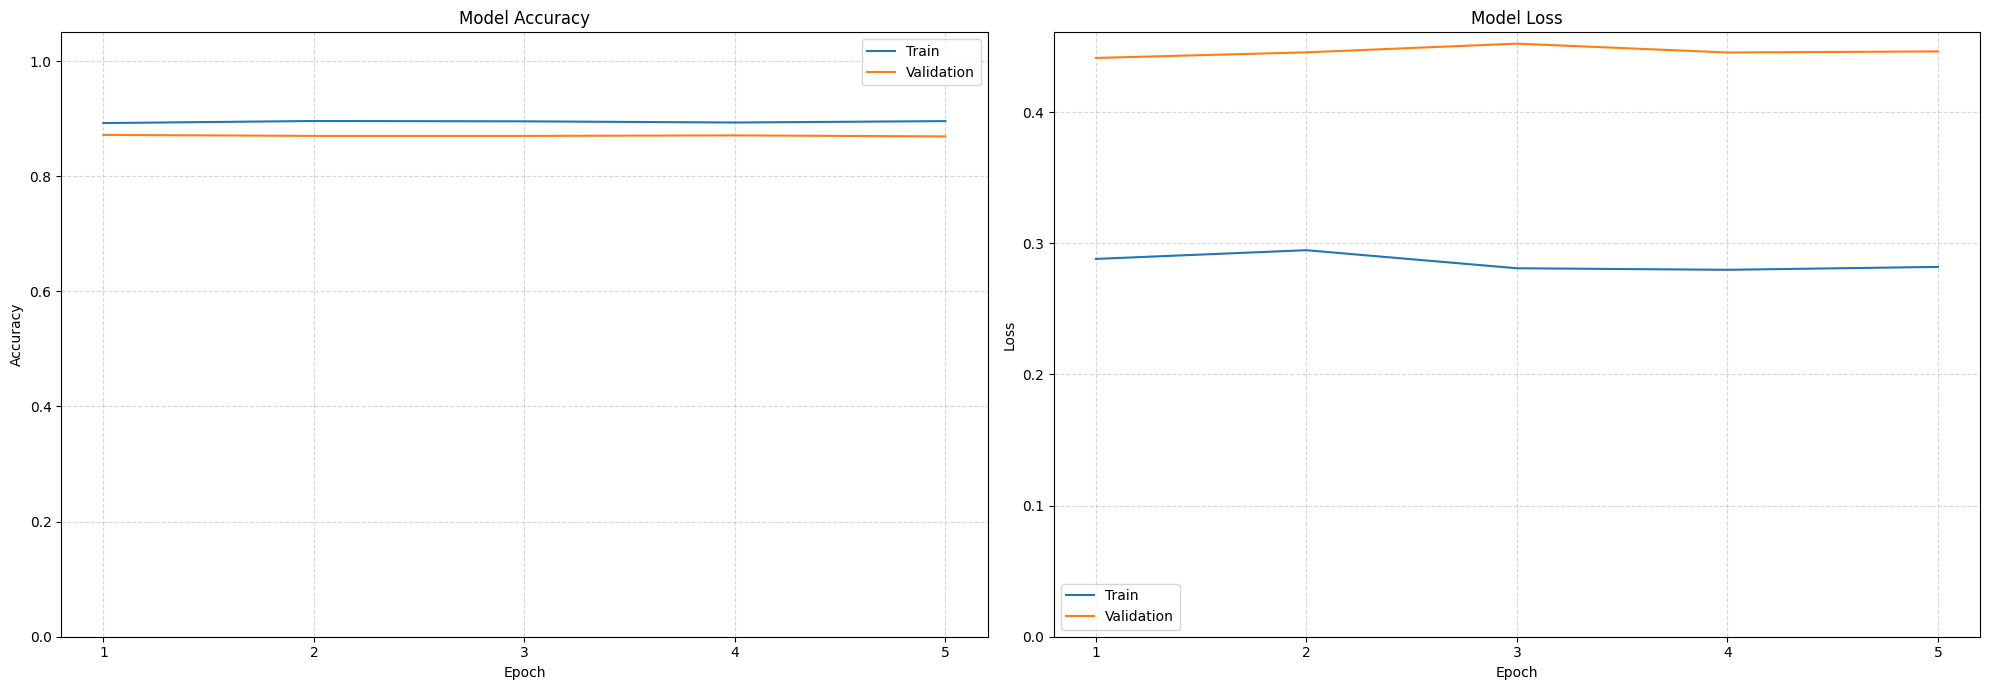

In [ ]:
plot_model_history(history)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def matrix(y_pred_classes, y_true):

    # Создаем матрицу ошибок
    cm = confusion_matrix(y_true, y_pred_classes)

    # Нормализуем по строкам (истинным классам)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Настройка визуализации
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)

    # Визуализация с процентным форматом
    ax = sns.heatmap(
        cm_normalized,
        annot=True,
        fmt='.1%',  # Формат процентов с 1 десятичным знаком
        linewidths=.5,
        cmap='Blues',
        cbar=True,
        vmin=0,  # Минимальное значение для цветовой шкалы
        vmax=1,  # Максимальное значение
        annot_kws={"size": 12}
    )
    # Добавляем подписи
    ax.set_xlabel('Предсказанные классы', fontsize=14)
    ax.set_ylabel('Истинные классы', fontsize=14)
    ax.set_title('Матрица ошибок', fontsize=16, pad=20)

    # Подписи классов
    #class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC']
    #ax.xaxis.set_ticklabels(class_names, rotation=45, ha='right')
    #ax.yaxis.set_ticklabels(class_names, rotation=0)

    plt.tight_layout()
    plt.show()


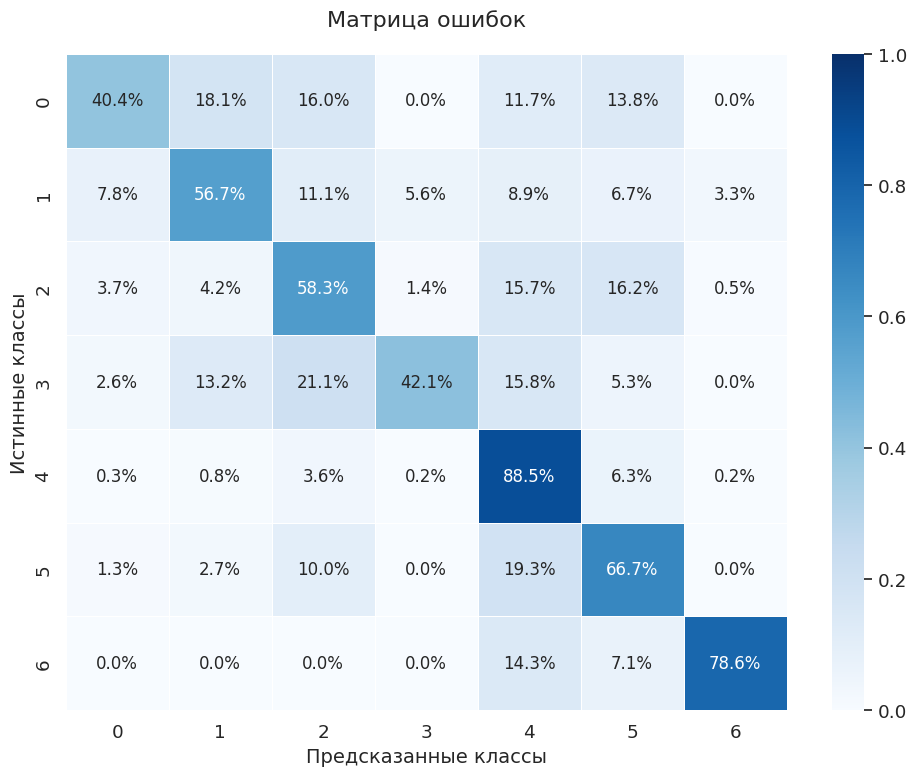

In [ ]:
matrix(y_true, y_pred)

Now, lets which category has much incorrect predictions

In [ ]:
def plot_simple_confusion_matrix_with_images(y_pred, y_true, class_names, images,
                                           mean=None, std=None, denormalize=True):
    """
    Параметры:
    ----------
    mean, std: среднее и стандартное отклонение, использованные при стандартизации.
               Если None, денормализация не применяется.
    denormalize: если True, изображения денормализуются перед отображением.
    """
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)

    assert y_true.shape == y_pred.shape, f"Формы y_true {y_true.shape} и y_pred {y_pred.shape} не совпадают"
    assert len(y_true) == len(images), "Количество изображений не соответствует меткам"

    cm = confusion_matrix(y_true, y_pred)
    n_classes = len(class_names)

    fig, axes = plt.subplots(n_classes, n_classes, figsize=(15, 15))

    for i in range(n_classes):
        for j in range(n_classes):
            ax = axes[i, j]
            ax.axis('off')

            indices = np.where((y_true == i) & (y_pred == j))[0]
            if len(indices) > 0:
                img = images[indices[0]].copy()  # Копируем, чтобы не менять исходные данные

                # Денормализация
                if denormalize and mean is not None and std is not None:
                    img = (img * std) + mean
                    img = np.clip(img, 0, 255).astype(np.uint8)  # Обрезаем значения и приводим к uint8

                ax.imshow(img, cmap='gray' if img.shape[-1] != 3 else None)
                ax.set_title(f"True: {class_names[i]}\nPred: {class_names[j]}")

    plt.tight_layout()
    plt.show()


In [ ]:
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('/content/ResNet50_72_82.h5')

In [ ]:
def test_model(model, X_test, Y_test):
    # Оценка точности модели
    model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
    print("Test Accuracy: {:.3f}%".format(model_acc * 100))

    # Получение предсказаний
    y_pred = model.predict(X_test)

    # Преобразование one-hot в индексы
    y_true = np.argmax(Y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Отчет о классификации
    clr = classification_report(y_true, y_pred, target_names=class_names.values())
    print(clr)

    # Визуализация примеров с восстановлением цветов
    sample_data = X_test[:30]

    # Обратное преобразование стандартизации
    sample_data_restored = sample_data * x_test_std + x_test_mean
    sample_data_restored = np.clip(sample_data_restored, 0, 255).astype(np.uint8)

    # Создаем фигуру с оптимальными размерами
    plt.figure(figsize=(20, 15))

    for i in range(30):
        plt.subplot(6, 5, i+1)
        plt.imshow(sample_data_restored[i])

        # Оптимизированные подписи
        plt.text(0.5, -0.05,
                f"True:{class_names[y_true[i]]}\nPredict:{class_names[y_pred[i]]}",
                fontsize=15,
                color='black',  # Черный цвет текста
                horizontalalignment='center',
                verticalalignment='top',
                transform=plt.gca().transAxes)  # Позиционирование относительно осей

        plt.axis("off")

    # Оптимизация расположения
    plt.subplots_adjust(top=0.95,
                      bottom=0.05,
                      left=0.05,
                      right=0.55,
                      hspace=0.3,  # Вертикальный отступ
                      wspace=0.05)  # Горизонтальный отступ
    plt.show()

Test Accuracy: 79.181%
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

       akies       0.40      0.63      0.49        60
         bcc       0.60      0.60      0.60        97
         bkl       0.53      0.51      0.52       224
          df       0.79      0.56      0.65        27
          nv       0.89      0.92      0.91      1320
         mel       0.67      0.48      0.56       246
        vasc       0.80      0.83      0.81        29

    accuracy                           0.79      2003
   macro avg       0.67      0.65      0.65      2003
weighted avg       0.79      0.79      0.79      2003



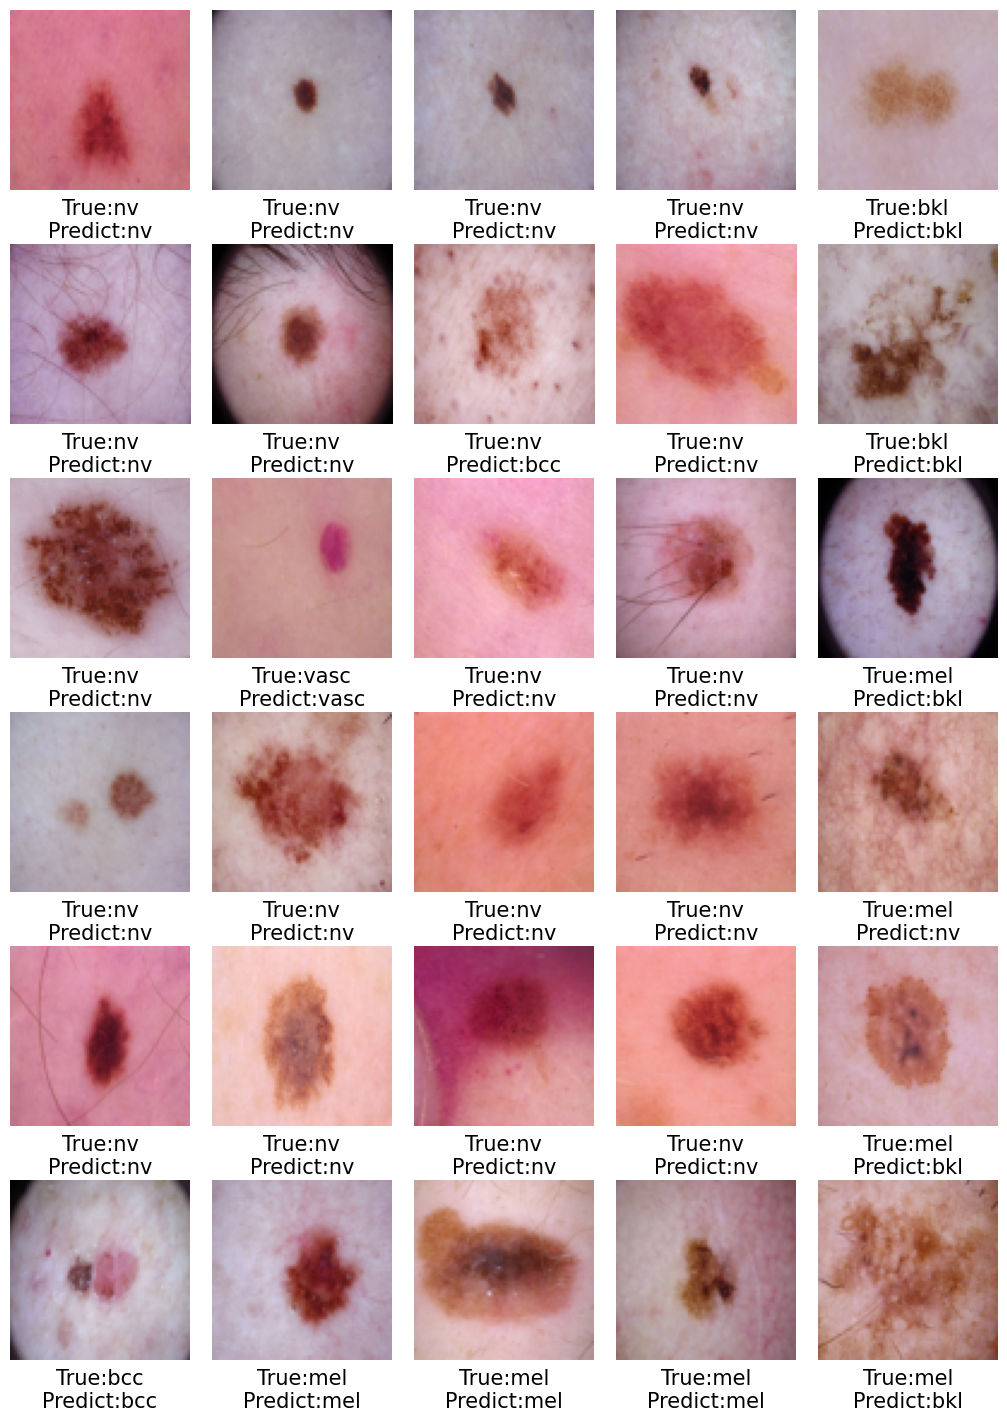

In [ ]:
test_model(model, x_test, y_test)

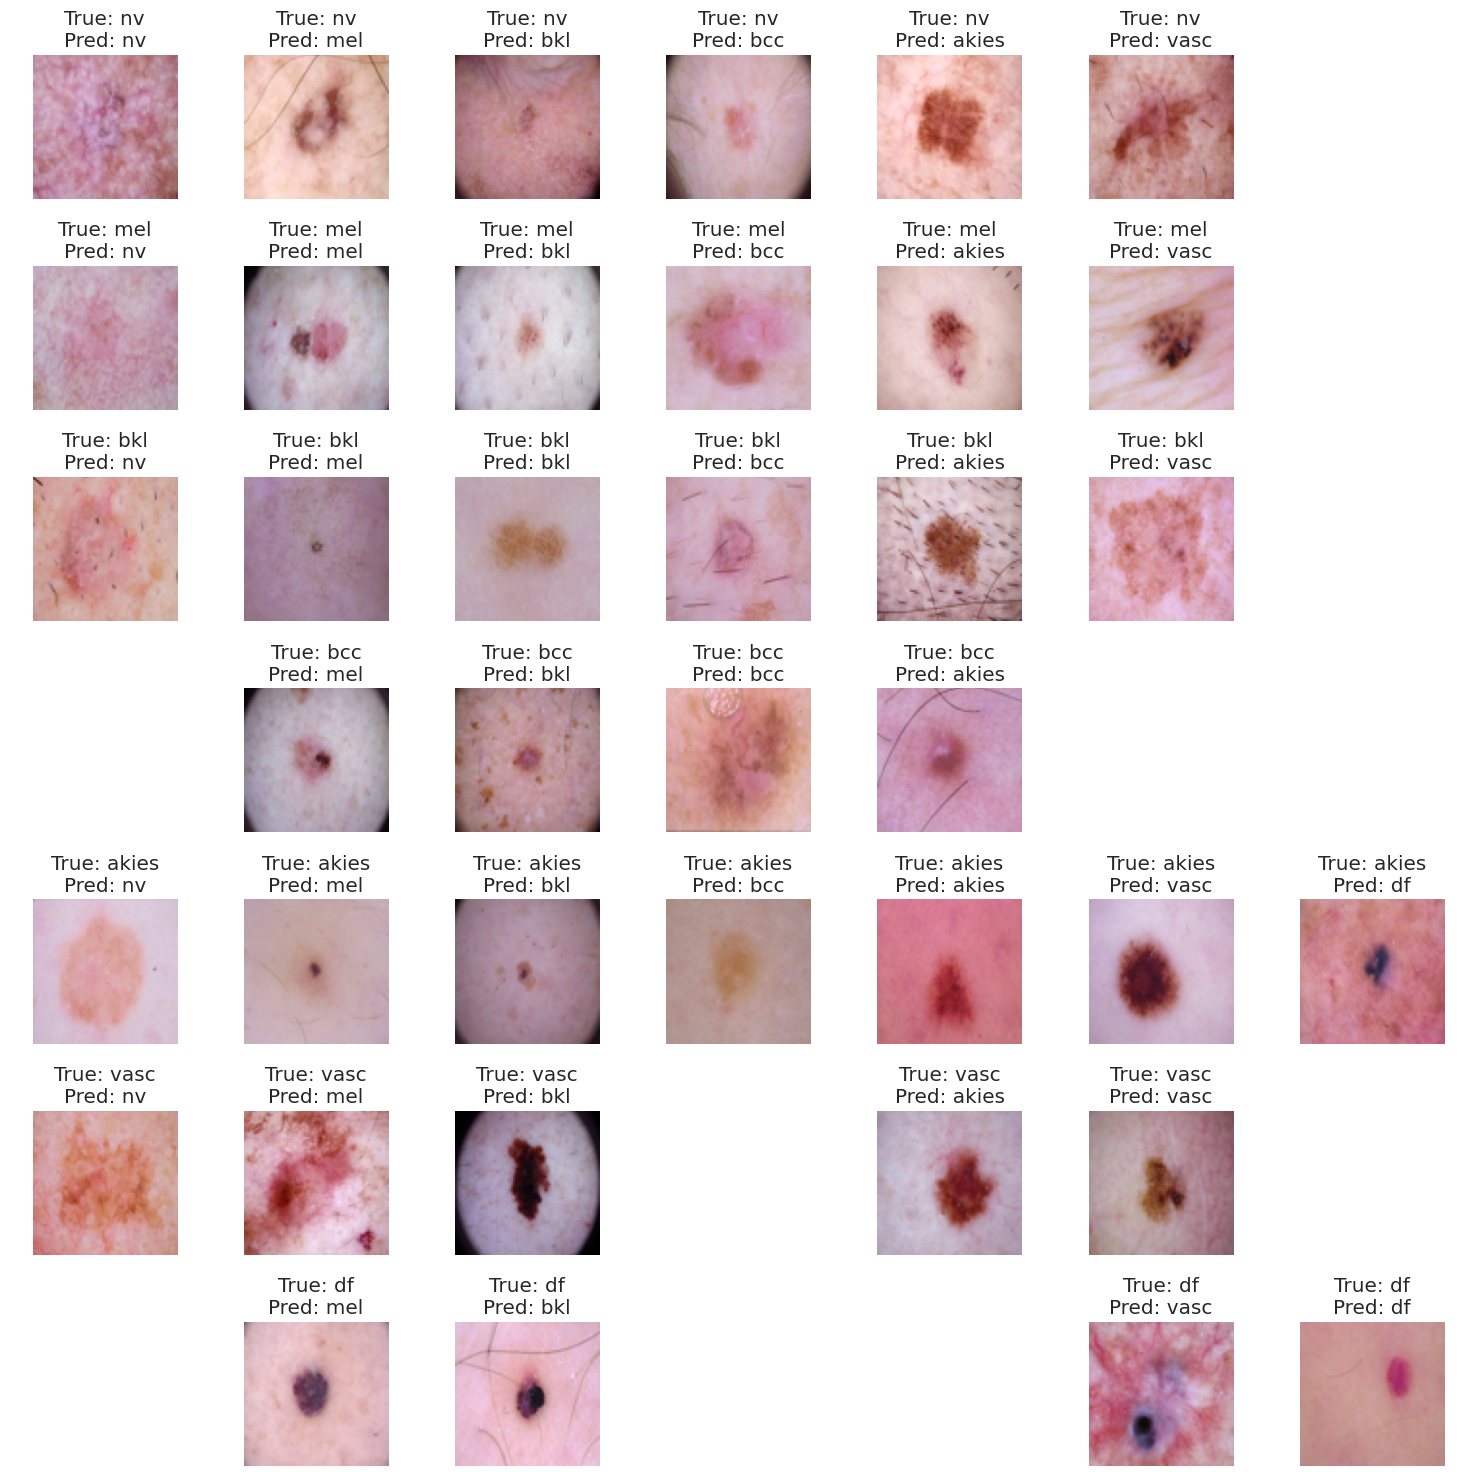

In [ ]:
plot_simple_confusion_matrix_with_images(y_pred, y_true, class_names, x_test, mean=x_test_mean,
    std=x_test_std,
    denormalize=True)

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

NameError: name 'confusion_mtx' is not defined

# Conclusion

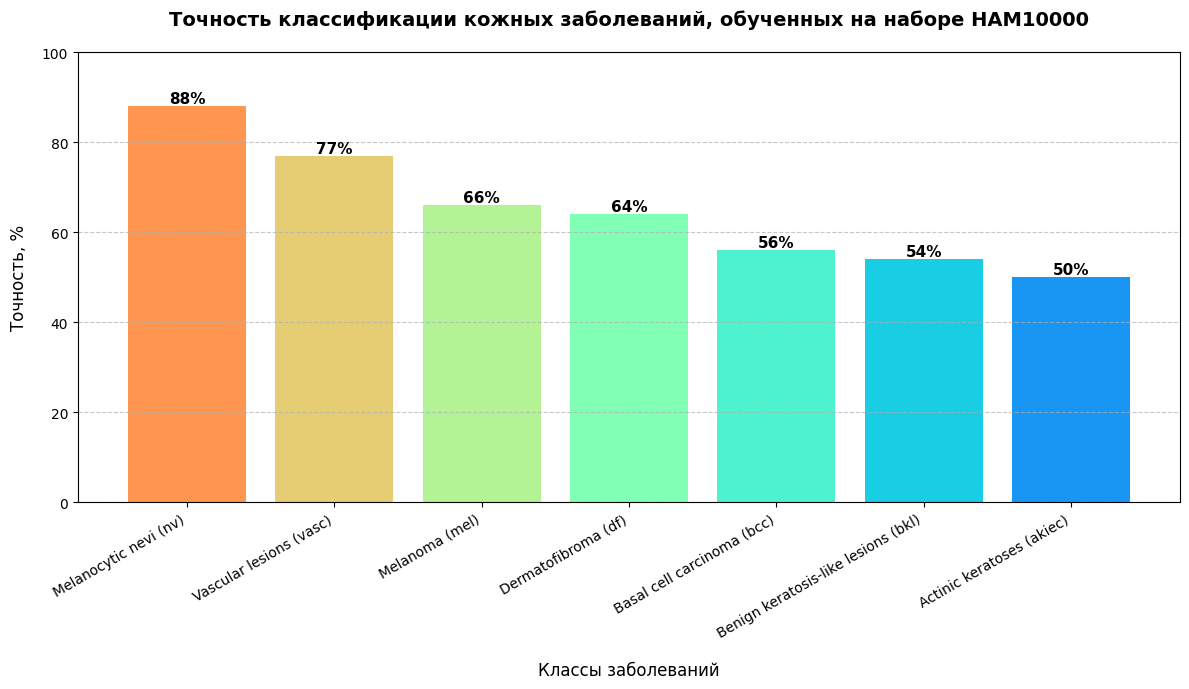

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Настройка шрифтов для поддержки русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'  # Или 'Arial' для Windows

# Данные
diagnoses = ['Melanocytic nevi (nv)', 'Vascular lesions (vasc)', 'Melanoma (mel)',
             'Dermatofibroma (df)', 'Basal cell carcinoma (bcc)',
             'Benign keratosis-like lesions (bkl)', 'Actinic keratoses (akiec)']
accuracy = [88, 77, 66, 64, 56, 54, 50]

# Создаем цветовую схему (градиент от зеленого к красному)
colors = plt.cm.rainbow(np.linspace(0.2, 0.8, len(accuracy)))[::-1]

# Создаем фигуру с увеличенным нижним отступом
plt.figure(figsize=(12, 7), dpi=100)
bars = plt.bar(diagnoses, accuracy, color=colors)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}%', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Настройки графика
plt.title('Точность классификации кожных заболеваний, обученных на наборе HAM10000',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Классы заболеваний', fontsize=12, labelpad=15)
plt.ylabel('Точность, %', fontsize=12, labelpad=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Поворачиваем подписи диагнозов на 30 градусов и выравниваем по правому краю
plt.xticks(rotation=30, ha='right')


plt.tight_layout()
plt.show()

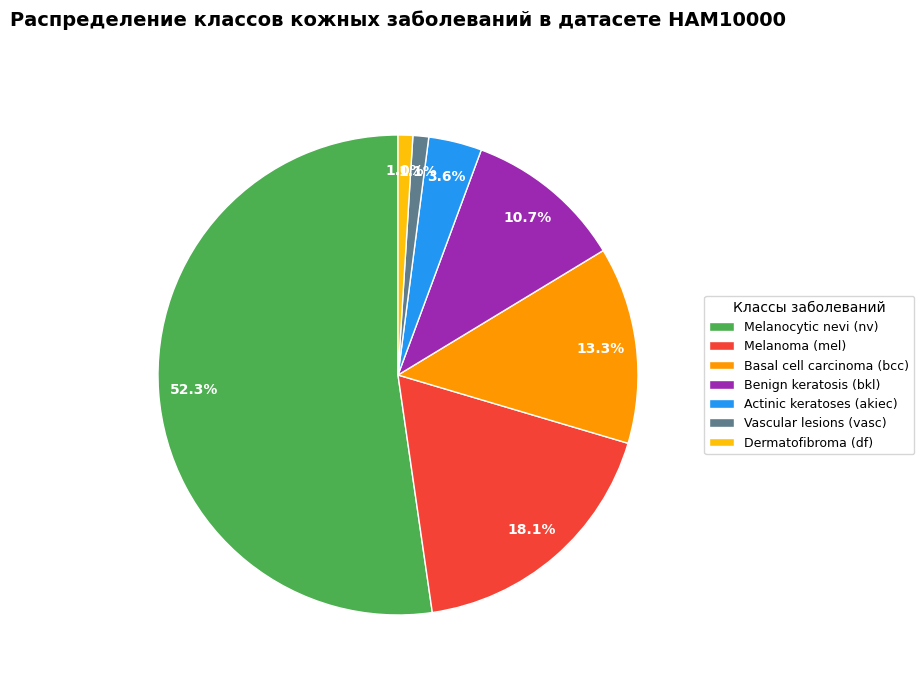

In [ ]:
import matplotlib.pyplot as plt

# Настройка шрифтов для поддержки русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'  # Или 'Arial' для Windows

# Данные
classes = ['Melanocytic nevi (nv)', 'Melanoma (mel)', 'Basal cell carcinoma (bcc)',
           'Benign keratosis (bkl)', 'Actinic keratoses (akiec)',
           'Vascular lesions (vasc)', 'Dermatofibroma (df)']
percentages = [52.28, 18.12, 13.27, 10.68, 3.59, 1.06, 0.99]
colors = ['#4CAF50', '#F44336', '#FF9800', '#9C27B0', '#2196F3', '#607D8B', '#FFC107']

# Создаем фигуру
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Создаем круговую диаграмму
wedges, texts, autotexts = ax.pie(percentages,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                  autopct='%1.1f%%',
                                  pctdistance=0.85)

# Настройка отображения процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Добавляем легенду
ax.legend(wedges, classes,
          title="Классы заболеваний",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

# Добавляем заголовок
plt.title('Распределение классов кожных заболеваний в датасете HAM10000\n',
          fontsize=14, fontweight='bold', pad=20)

# Увеличиваем отступы
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

SIZE = 75
CHANELL = 3
input_shape = (SIZE, SIZE, CHANELL)
num_classes = 7

base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, CHANELL))

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 75, 75, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)